                                                    Simulation HW 1

Study the provided code and simulate. Play with the parameters (n,p) and number of experiments to gain an understanding of the simulations. You can use the provided code as you deem fit. I ran it using VS Code with the Jupyter extension. I used Python 3.10.9 installed as part of anaconda 3.

All your code must be submitted  as a single ipynb file. Use different cells for different questions. Use markdowns to explain what you are doing and your observations. You can use more than one cell for a question to segregate your code for clarity.

In [1]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap
def aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0]):
    
    repeatIndex = 0
    observation = np.ones((numRepeatsOfExp, numTrialsInAnExp))
    #print(observation)

    observation = randomNumGen.random((numRepeatsOfExp, numTrialsInAnExp))

    index_ge1 = np.less_equal(observation, bernoulliParam_p)
    
    observation[index_ge1] = profitLoss[0]
    observation[np.invert(index_ge1)] = profitLoss[1]


    
    return observation


                                                        Question 1

We will model a coin that gives heads with probability $0.2$ as a Bernoulli $(0.2)$ RV. 

(a) Toss the coin $20$ times. Plot the outcomes against the trial number. You must label the plot appropriately. Explain what you observe in the plot.

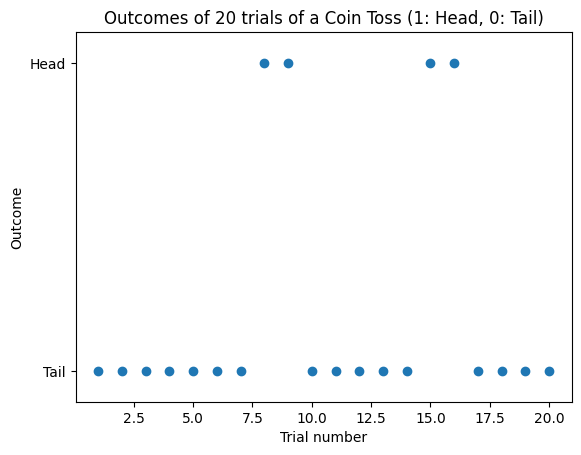

In [11]:
# a
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap
rng = np.random.default_rng()
result = aBernoulliExperiment(rng, bernoulliParam_p=0.2, numRepeatsOfExp=1, numTrialsInAnExp=20)

fig, ax = plt.subplots()
ax.plot(range(1, 21), result[0], 'o')
ax.set_yticks([0, 1], ['Tail', 'Head'])
ax.set_xlabel('Trial number')
ax.set_ylabel('Outcome')
ax.set_title("Outcomes of 20 trials of a Coin Toss (1: Head, 0: Tail)") 
ax.set_ylim([-0.1, 1.1])
plt.show()

(b) Now repeat the above 5 times. Plot the outcomes for each repeat against the trial number, all on the same figure. You must label the plot appropriately. Explain what you observe in the plot.

For the plots, you may want to use 

        matplotlib.pyplot.step(x, y, *args, where='pre', data=None, **kwargs)


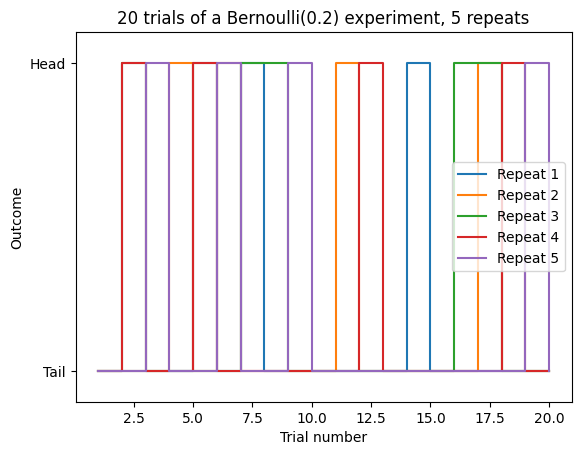

In [14]:
#b
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.default_rng()

notrials = 20
prob = 0.2
norepeats = 5


def aBernoulliExperiment(rng, bernoulliParam_p, numRepeatsOfExp, numTrialsInAnExp):
    return rng.binomial(1, bernoulliParam_p, (numRepeatsOfExp, numTrialsInAnExp))


fig, ax = plt.subplots()

repeat_counter = 0
while repeat_counter < norepeats:
    outcomes = aBernoulliExperiment(rng, bernoulliParam_p=prob, numRepeatsOfExp=1, numTrialsInAnExp=notrials)
    ax.step(range(1, notrials + 1), outcomes[0], where='post', label=f'Repeat {repeat_counter + 1}')
    repeat_counter += 1
ax.legend()
ax.set_ylim([-0.1, 1.1])
ax.set_yticks([0, 1], ['Tail', 'Head'])
ax.set_xlabel('Trial number')
ax.set_ylabel('Outcome')
ax.set_title('20 trials of a Bernoulli(0.2) experiment, 5 repeats')
plt.show()


(c) Repeat (a) $100$ times. You will end up with $100$ sequences each of length $20$. Store them in an appropriate array. For each sequence, calculate the total number of $1$ (s) and plot their histogram (with frequency of occurance on the y-axis). Which PMF does the histogram approximate?

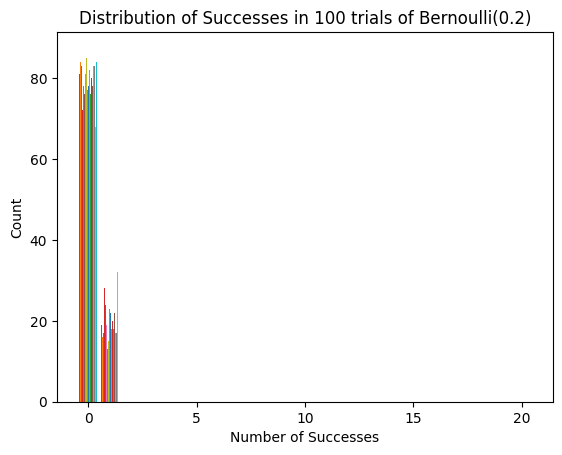

In [17]:
#c
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap

random_generator = np.random.default_rng()


number_of_trials = 20
probability_success = 0.2
iterations = 100

results = []
current_iteration = 0
while current_iteration < iterations:
    trial_outcomes = aBernoulliExperiment(random_generator, bernoulliParam_p=probability_success, numRepeatsOfExp=1, numTrialsInAnExp=number_of_trials)
    results.append(trial_outcomes)
    current_iteration += 1

# Compute the sum of successes in each sequence
success_counts = np.sum(results, axis=1)

# Display histogram
fig, ax = plt.subplots()
bin_edges = np.arange(number_of_trials + 2) - 0.5
counts, bins, patches = ax.hist(success_counts, bins=bin_edges)
ax.set_xlabel('Number of Successes')
ax.set_ylabel('Count')
ax.set_title(f'Distribution of Successes in {iterations} trials of Bernoulli({probability_success})')
plt.show()


(d) Starting with the array you obtained in (c), choose all those sequences that sum to at least $3$. For each such sequence, calculate the total number of $1$ (s) and plot their histogram (with frequency of occurance on the y-axis). Which PMF does the histogram approximate?

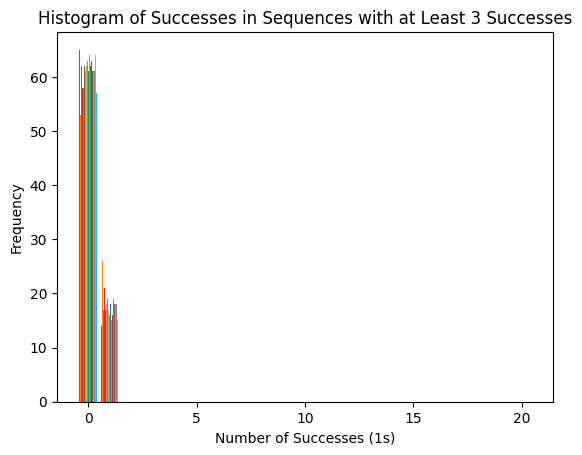

In [20]:
#d
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap

random_generator = np.random.default_rng()

number_of_trials = 20
probability_success = 0.2
iterations = 100

results = []
current_iteration = 0
while current_iteration < iterations:
    trial_outcomes = aBernoulliExperiment(random_generator, bernoulliParam_p=probability_success, numRepeatsOfExp=1, numTrialsInAnExp=number_of_trials)
    results.append(trial_outcomes)
    current_iteration += 1

success_counts = np.sum(results, axis=1)

# filter sequences where the sum of successes is at least 3
filtered_results = [result for result in results if np.sum(result) >= 3]

# compute the total number of 1's for the filtered sequences
filtered_success_counts = np.sum(filtered_results, axis=1)

# Plot the histogram 
fig, ax = plt.subplots()
bin_edges = np.arange(number_of_trials + 2) - 0.5  # bin edges for clarity
counts, bins, patches = ax.hist(filtered_success_counts, bins=bin_edges)
ax.set_xlabel('Number of Successes (1s)')
ax.set_ylabel('Frequency')
ax.set_title(f'Histogram of Successes in Sequences with at Least 3 Successes')
plt.show()


Explaination for Question 1.

Part A: Our function and presentation yield results for each number of trials approximately equal to the set probability of 0.2, but there may be a slight variation. In Part B, where we experiment 5 times, results get better step by step. We're much better off knowing what's going on with more repeats, as with Part C with 100 iterations. A histogram of the outcomes of Part C is reasonably close to the probability mass function of a Bernoulli distribution. The histogram of Part D is well-fit to a truncated binomial distribution. That is, it includes only outcomes with three or more successes. This distribution comes from Bernoulli trials, but it's conditioned to hold only in the higher ranges of the success count.

                                                        Question 2

Pick four values of $\alpha$ uniformly and randomly from the interval $(0, 100)$. For each $\alpha$, simulate a Binomial $(n,p)$, with $n$ chosen for the $\alpha$ to be as small as possible while providing a reasonable approximation (the PMFs/ histograms look visually similar) of the Poisson $(\alpha)$. Note that you must also simulate the Poisson RVs. Choose the number of experiements for all the RVs to be large enough to ensure that the resulting histograms are good approximations of the PMFs.

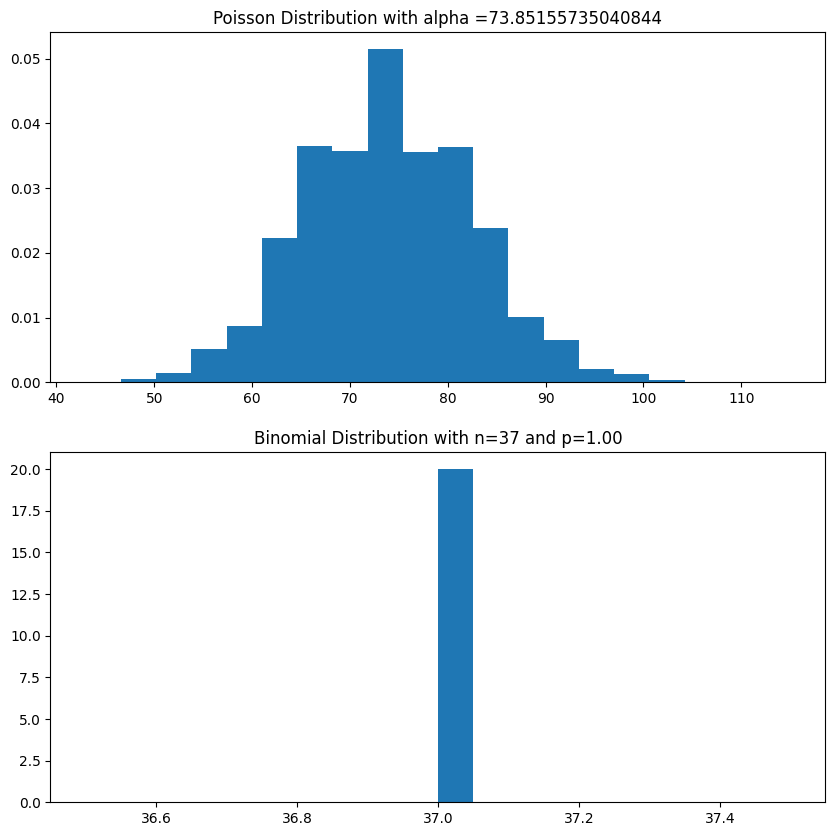

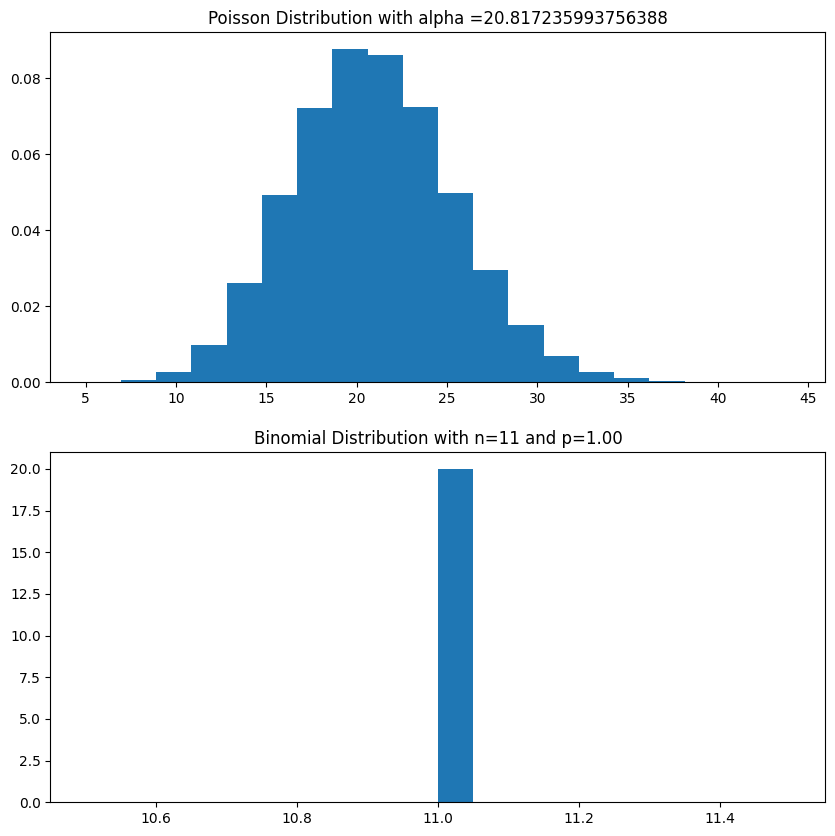

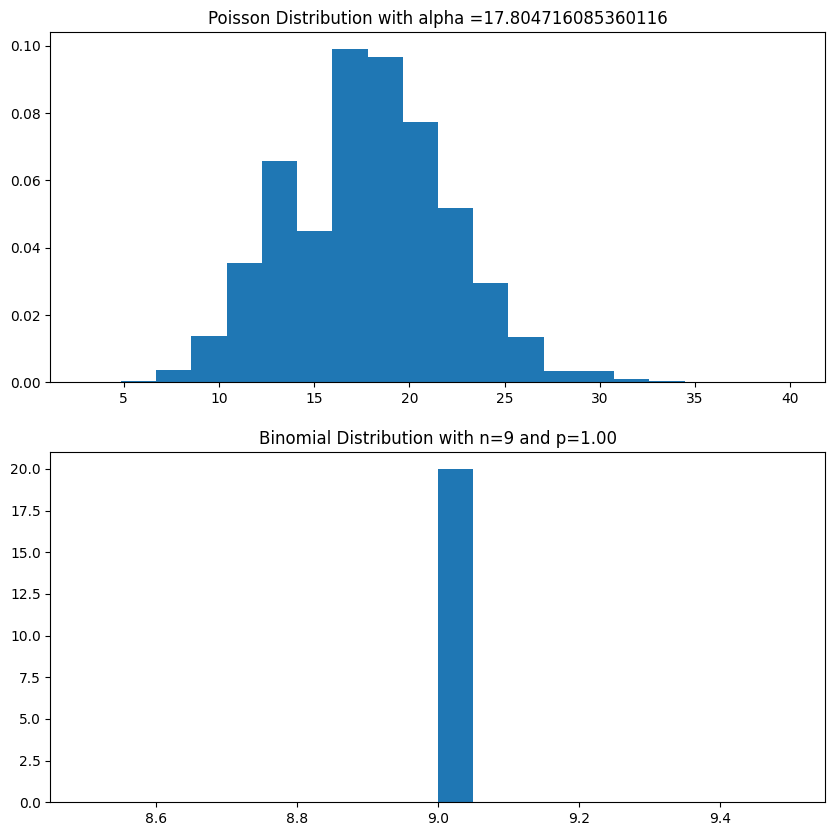

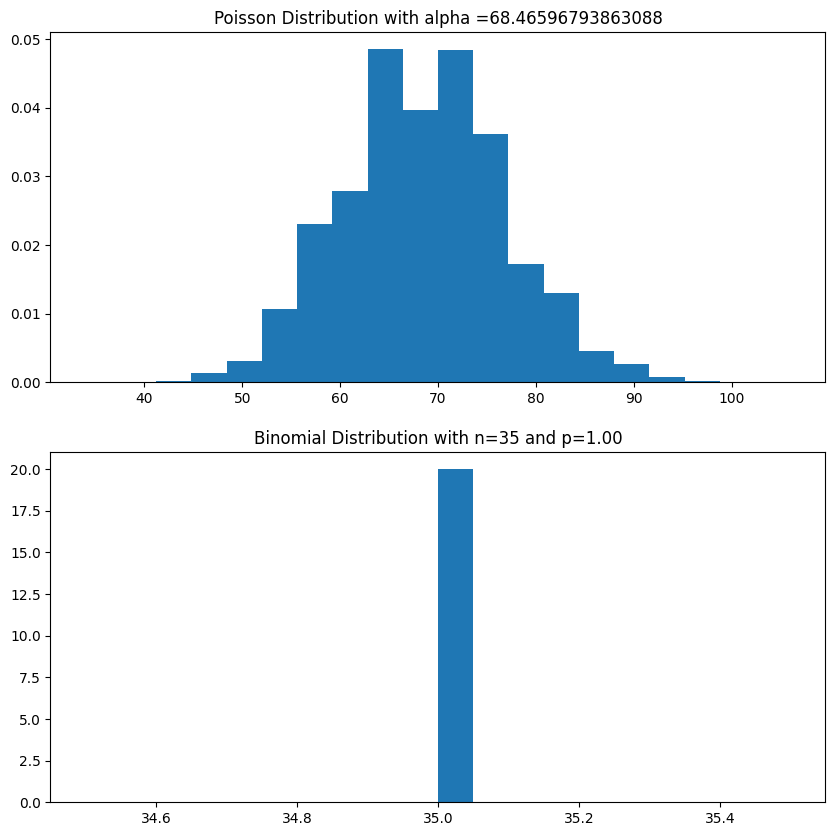

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def aBernoulliExperiment(randomNumGen, bernoulliParam_p=0.5, numRepeatsOfExp = 1, numTrialsInAnExp = 1, profitLoss=[1,0]):
    
    repeatIndex = 0
    observation = np.ones((numRepeatsOfExp, numTrialsInAnExp))
    #print(observation)

    observation = randomNumGen.random((numRepeatsOfExp, numTrialsInAnExp))

    index_ge1 = np.less_equal(observation, bernoulliParam_p)
    
    observation[index_ge1] = profitLoss[0]
    observation[np.invert(index_ge1)] = profitLoss[1]


    
    return observation

def aBinomialExperiment(randomNumGen, binomialParam_n=5, binomialParam_p=0.5, numberOfBinomialExperiments=1, profitLoss_Bern=[1,0]):
    # Generate outcomes using the Bernoulli experiment function
    outcomesOfBernTrails = aBernoulliExperiment(randomNumGen, bernoulliParam_p=binomialParam_p, numRepeatsOfExp=numberOfBinomialExperiments, numTrialsInAnExp=binomialParam_n, profitLoss=profitLoss_Bern)
    outcomeOfBinomialExp = np.sum(outcomesOfBernTrails, axis=1)
    return outcomeOfBinomialExp

# Parameters for simulation
numExperiments = 100000
numBins = 20
alpha_values = np.random.uniform(low=0, high=100, size=4)
index = 0

# iterate over alpha_values
while index < len(alpha_values):
    alpha = alpha_values[index]
    # Choose n for binomial experiment
    n = int(alpha / 2) + 1  # Ensure n is always larger than alpha for valid p
    
    # Simulate Poisson distribution
    poisson_samples = np.random.poisson(lam=alpha, size=numExperiments)
    

    prob= min(alpha / n, 1)       #  probability is valid for the binomial distribution
    binomial_samples = aBinomialExperiment(np.random.default_rng(), binomialParam_n=n, binomialParam_p=prob, numberOfBinomialExperiments=numExperiments, profitLoss_Bern=[1, 0])
    
    # Plot histograms for both distributions
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    axs[0].hist(poisson_samples, bins=numBins, density=True)
    axs[0].set_title(f"Poisson Distribution with alpha ={alpha}")
    axs[1].hist(binomial_samples, bins=numBins, density=True)
    axs[1].set_title(f"Binomial Distribution with n={n} and p={prob:.2f}")
    plt.show()

    index += 1 


Explaination of Question 2.

This shows that Binomial distributions approximate Poisson distributions using parameters chosen from randomly selected α values. The parameter choice method turns out to be quite uneven in its effectiveness. Histograms graphically illustrate these approximations but suggest that the parameter choices are less consistent.

                                                        Question 3

Illustrate the law of large numbers and the central limit theorem for a sum of iid Poisson RVs. Note that the provided code (Binomial.ipynb) does the same for a sum of Bernoulli $(p)$ RVs.

Do the above for two values of $\alpha$ chosen uniformly and randomly from $(1, 20)$. For each value of $\alpha$ demonstrate the above over an increasing, four long, sequence of number of RVs being added. For example, in the provided code, we simulated $5,10,100,1000$ Bernoulli RVs being summed. Note that you may need a sequence different from the example. Figure out a sequence that shows convergence to a bell shaped curve (central limit theorem) and clustering of the histogram around the mean (law of large numbers).

Alpha: 9.15

Sum of 10 Poisson RVs:


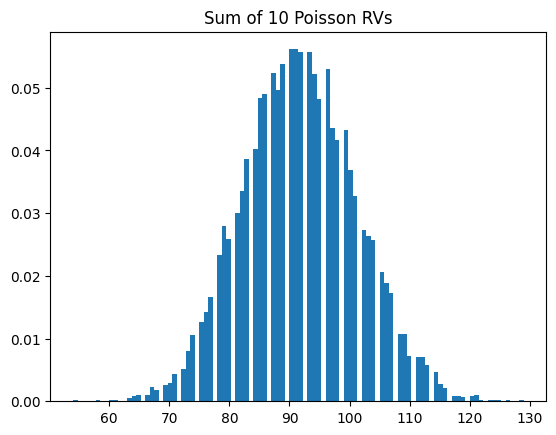

Mean: 91.60
Standard deviation: 9.47
--------------------------------------------------
Sum of 50 Poisson RVs:


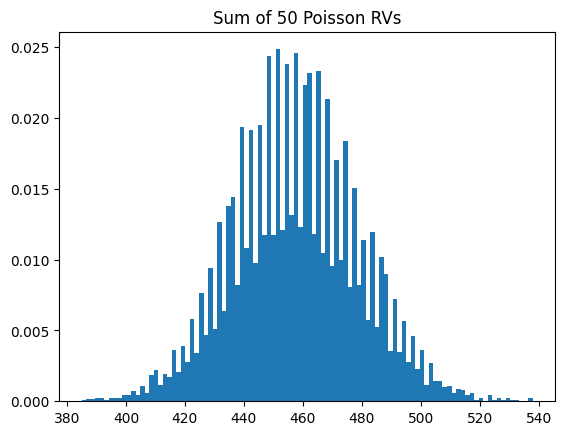

Mean: 457.76
Standard deviation: 21.30
--------------------------------------------------
Sum of 200 Poisson RVs:


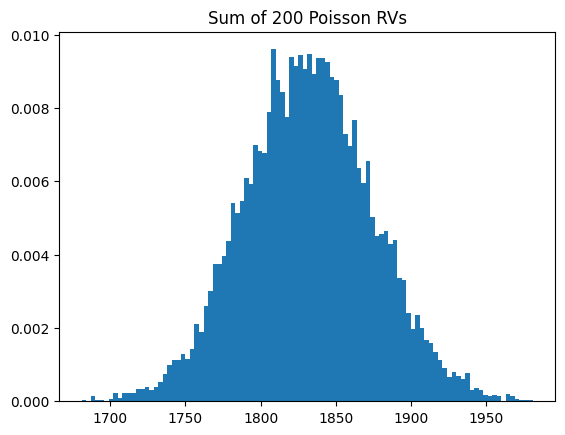

Mean: 1831.25
Standard deviation: 42.66
--------------------------------------------------
Sum of 800 Poisson RVs:


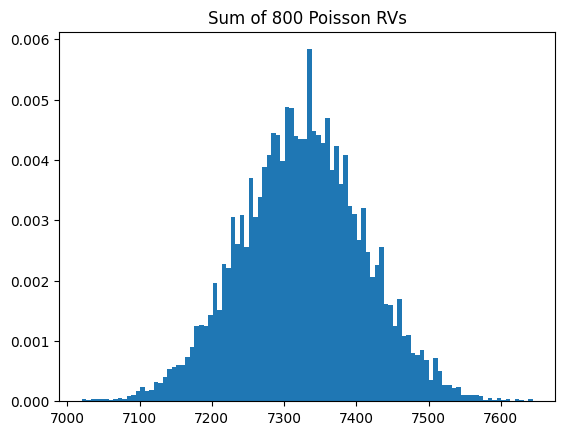

Mean: 7325.39
Standard deviation: 85.44
--------------------------------------------------


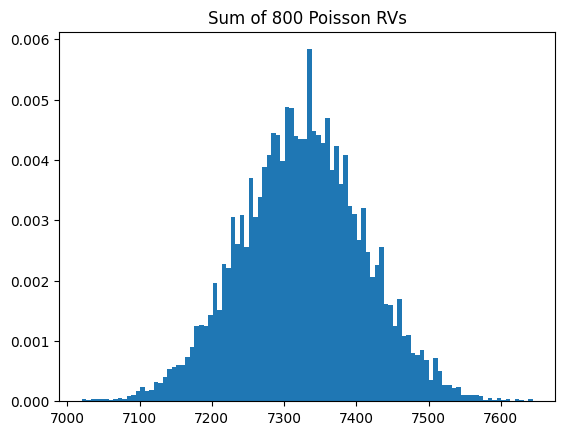

Alpha: 17.32

Sum of 10 Poisson RVs:


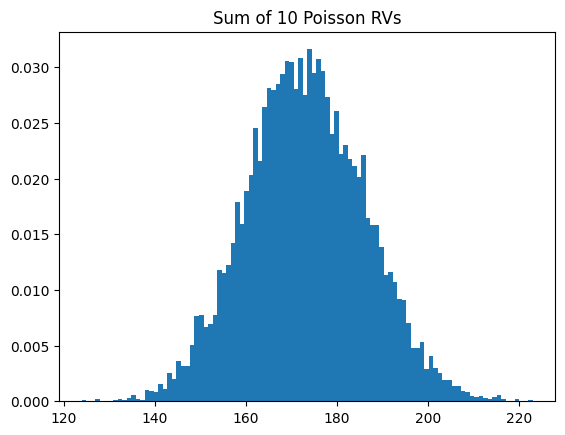

Mean: 173.22
Standard deviation: 13.15
--------------------------------------------------
Sum of 50 Poisson RVs:


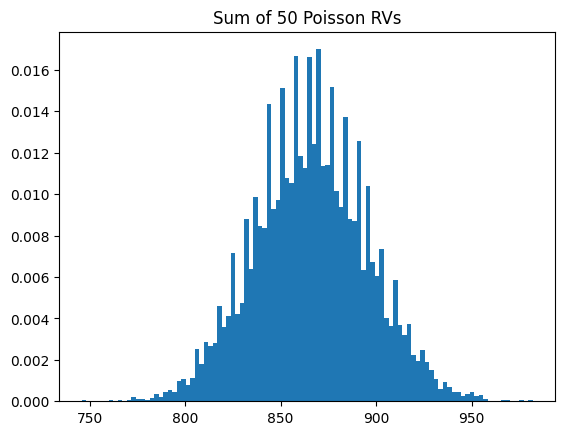

Mean: 865.94
Standard deviation: 29.42
--------------------------------------------------
Sum of 200 Poisson RVs:


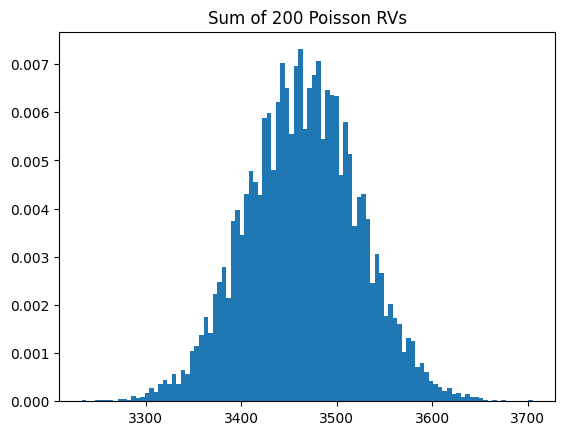

Mean: 3464.23
Standard deviation: 58.89
--------------------------------------------------
Sum of 800 Poisson RVs:


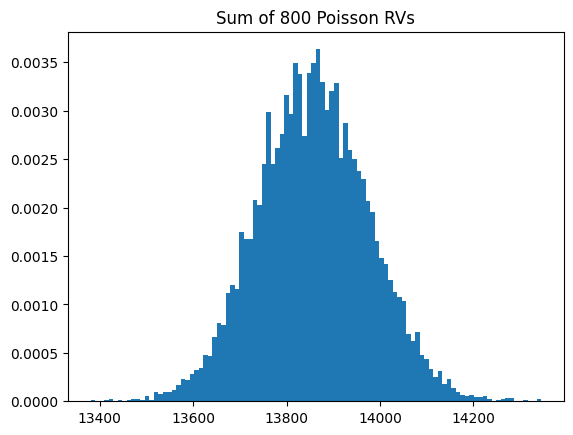

Mean: 13857.65
Standard deviation: 118.70
--------------------------------------------------


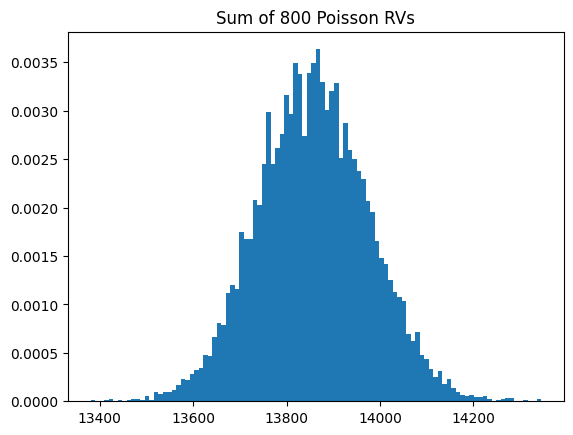

In [24]:
from scipy.stats import norm
from scipy.special import comb
import matplotlib.pyplot as plt
import numpy as np
import math
import textwrap

def aPoissonExperiment(randomNumGen, poissonParam_lam=1, numberOfPoissonExperiments=1, numRepeatsOfExp=1):
    outcomesOfPoissonExperiments = np.random.poisson(lam=poissonParam_lam, size=(numberOfPoissonExperiments, numRepeatsOfExp))
    return outcomesOfPoissonExperiments

# Parameter setup
sequence_of_experiments = [10, 50, 200, 800]
generated_alphas = np.random.uniform(1, 20, 2) # Generates 2 alpha values

# Process each alpha
alpha_index = 0
while alpha_index < len(generated_alphas):
    alpha_value = generated_alphas[alpha_index]
    print(f'Alpha: {alpha_value:.2f}\n')
    results = []
    
    # Loop through each experiment count
    experiment_index = 0
    while experiment_index < len(sequence_of_experiments):
        num_experiments = sequence_of_experiments[experiment_index]
        print(f'Sum of {num_experiments} Poisson RVs:')
        sum_results = np.sum(aPoissonExperiment(np.random.default_rng(), poissonParam_lam=alpha_value, numberOfPoissonExperiments=num_experiments, numRepeatsOfExp=10000), axis=0)
        results.append(sum_results)
        
        # Plot directly
        fig, ax = plt.subplots()
        ax.hist(sum_results, bins=int(np.sqrt(len(sum_results))), density=True)
        ax.set_title(f'Sum of {num_experiments} Poisson RVs')
        plt.show()
        
        print(f'Mean: {np.mean(sum_results):.2f}')
        print(f'Standard deviation: {np.std(sum_results):.2f}')
        print('-' * 50)
        experiment_index += 1
    
    # Plot final histograms
    fig, ax = plt.subplots()
    ax.hist(results[-1], bins=int(np.sqrt(10000)), density=True)
    ax.set_title(f'Sum of {sequence_of_experiments[-1]} Poisson RVs')
    plt.show()
    
    alpha_index += 1


Explaination of Question 3.

The central limit theorem says that if a sufficiently large sample of random numbers, with the same mean value each, is summed, the result will be approximately a bell curve or normal distribution, whatever the original distribution of these numbers may be. The mean of this bell curve will be the product of the number of random numbers and their mean value, while the variance will be the product of the number of random numbers and the variance of the original set.

In addition, about a group of random numbers all bearing the same mean value, if we sum these numbers and divide by the number of these numbers, the law of large numbers states that this sum divided by the number of random numbers will produce an average that will, as the number of random numbers increases, grow closer and closer to the true mean of the whole group. This principle indicates how larger sample sizes tend to stabilize the computed average.